In [2]:
import cv2
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from img_util import imshow

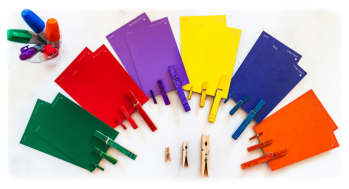

In [3]:
img1=cv2.imread('pic4.jpg')
imshow(img1[:,:,::-1],'')

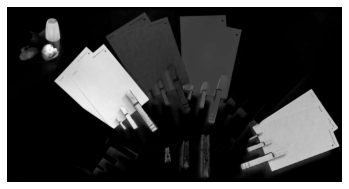

In [6]:
red_img=cv2.subtract(img1[:,:,-1],cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY))
imshow(red_img,'','gray')

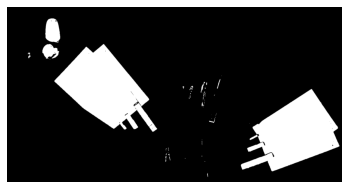

In [10]:
_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
imshow(red_bw,'','gray')

In [11]:
strel=cv2.getStructuringElement(cv2.MORPH_RECT,[10,10])
strel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

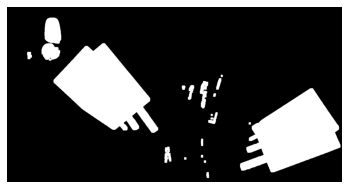

In [12]:
red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

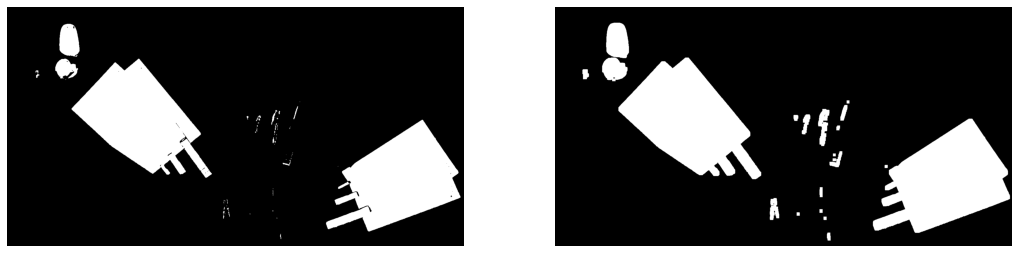

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_dilate=cv2.dilate(red_bw,strel)
imshow(red_dilate,'','gray')

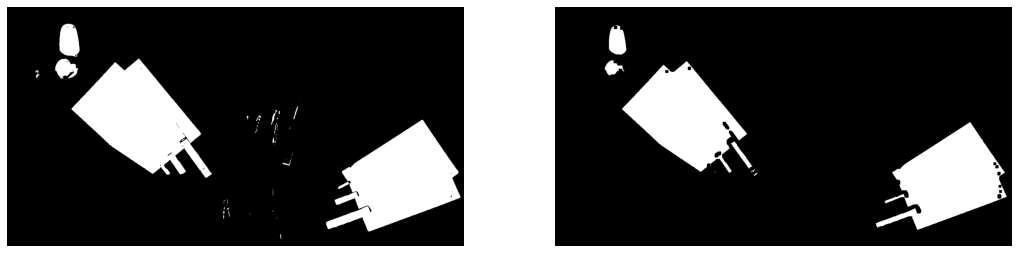

In [18]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw,'','gray')
plt.subplot(122)
red_erode=cv2.erode(red_bw,strel)
imshow(red_erode,'','gray')

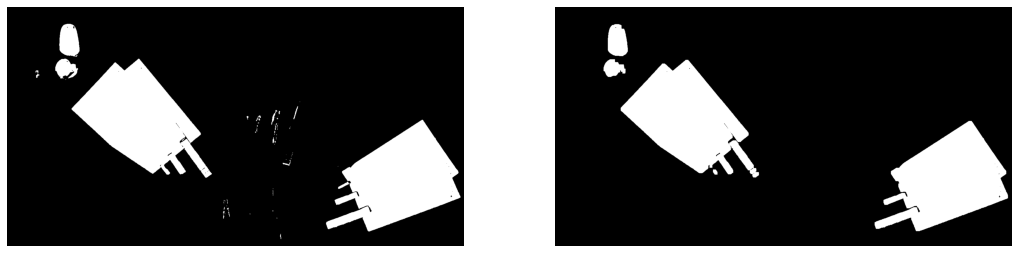

In [20]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_open=cv2.morphologyEx(red_bw,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_open,'','gray')

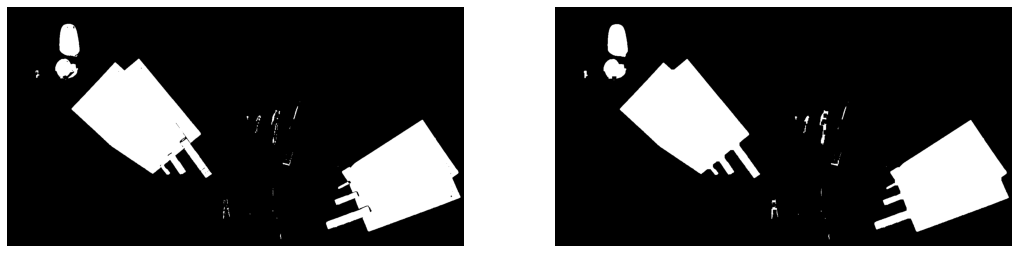

In [21]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close=cv2.morphologyEx(red_bw,cv2.MORPH_CLOSE,strel,iterations=1)
imshow(red_close,'','gray')

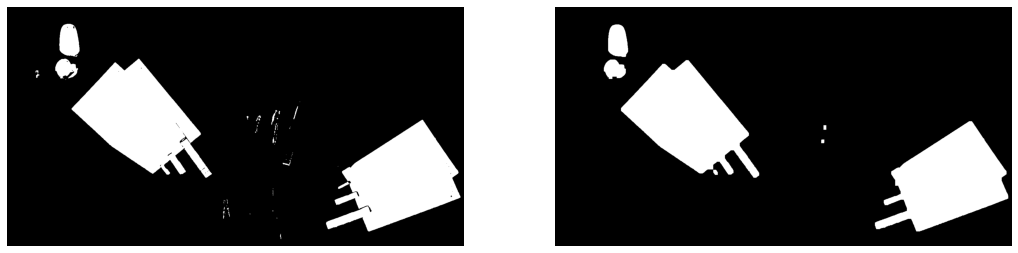

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close2=cv2.morphologyEx(red_close,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

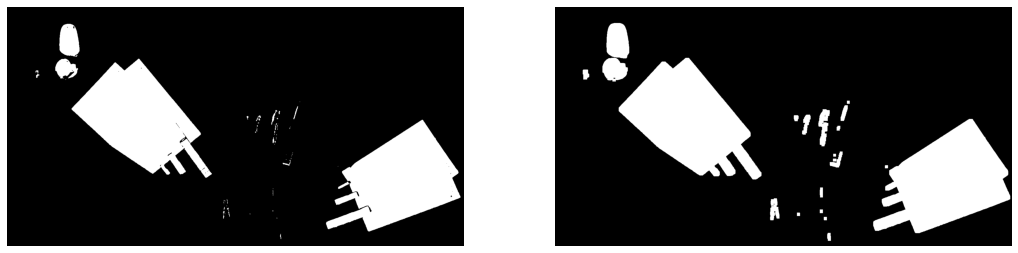

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN,strel,iterations=1)
imshow(red_close2,'','gray')

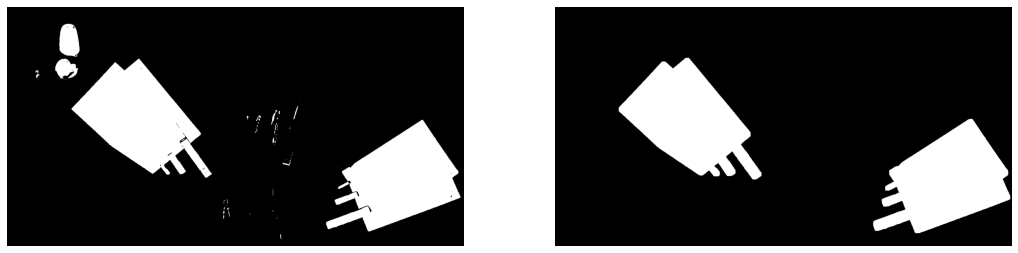

In [34]:
plt.figure(figsize=(18,6))
plt.subplot(121); imshow(red_bw, '','gray')
plt.subplot(122)
red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),8500)
imshow(red_close3,'','gray')

In [38]:
rp = ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))
rp

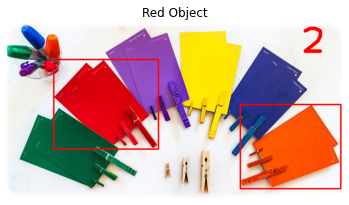

In [57]:
# summary
img1=cv2.imread('pic4.jpg')

_,red_bw=cv2.threshold(red_img,60,255,cv2.THRESH_BINARY)
strel=cv2.getStructuringElement(cv2.MORPH_RECT,[10,10])
red_dilate=cv2.dilate(red_bw,strel)
red_close2=cv2.morphologyEx(red_dilate,cv2.MORPH_OPEN,strel,iterations=1)
red_close3=ski.morphology.remove_small_objects(red_close2.astype(bool),8500)
rp = ski.measure.regionprops(ski.measure.label(red_close3.astype('uint8')))

img_copy=img1.copy()
for r in rp:
    y1,x1,y2,x2 = r.bbox
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
count=str(len(rp))
cv2.putText(img_copy,count,(img_copy.shape[1]-200,150),cv2.FONT_HERSHEY_PLAIN,12,(0,0,255),thickness=15)
imshow(img_copy[:,:,::-1],'Red Object')
